In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Data has been sources from the flashbots dashboard : https://explore.flashbots.net/

Data was pulled as a JSON file using inspect page. 

The data is basically the cumulative sum of MEV picked up by the mev-inspect-py bot and I cleaned up the data in the form of a dataframe which will very much be helpful to our work in TwinStake for modelling purposes as well.

In [2]:
import requests

url = "https://data.flashbots.net/api/public/dashboard/12568e65-103a-4f61-a45c-ab8c4770b266/card/670?parameters=%5B%5D"
x = requests.get(url).json()

x

{'data': {'rows': [['2019-12-12T00:00:00Z', 12.008172510384016],
   ['2019-12-14T00:00:00Z', 12.008188687234565],
   ['2019-12-15T00:00:00Z', 12.008202147008781],
   ['2019-12-16T00:00:00Z', 23.830000813835838],
   ['2019-12-17T00:00:00Z', 26.48126541660293],
   ['2020-01-02T00:00:00Z', 26.481389579565022],
   ['2020-01-05T00:00:00Z', 66.49039075557945],
   ['2020-01-08T00:00:00Z', 85.97885468052655],
   ['2020-01-09T00:00:00Z', 85.97896938634545],
   ['2020-01-13T00:00:00Z', 106.45321123635553],
   ['2020-01-14T00:00:00Z', 284.98871322198113],
   ['2020-01-15T00:00:00Z', 655.4773983345805],
   ['2020-01-16T00:00:00Z', 671.5037351321956],
   ['2020-01-17T00:00:00Z', 688.5668861731867],
   ['2020-01-18T00:00:00Z', 694.9134845079691],
   ['2020-01-20T00:00:00Z', 787.406743131167],
   ['2020-01-23T00:00:00Z', 841.6916936421673],
   ['2020-01-25T00:00:00Z', 842.6186456407216],
   ['2020-01-30T00:00:00Z', 9468.347923954225],
   ['2020-01-31T00:00:00Z', 9505.532344695577],
   ['2020-02-01T00

In [3]:
data = {'data' : [['2019-12-12T00:00:00Z', 12.008172510384016],
   ['2019-12-14T00:00:00Z', 12.008188687234565],
   ['2019-12-15T00:00:00Z', 12.008202147008781],
   ['2019-12-16T00:00:00Z', 23.830000813835838],
   ['2019-12-17T00:00:00Z', 26.48126541660293],
   ['2020-01-02T00:00:00Z', 26.481389579565022],
   ['2020-01-05T00:00:00Z', 66.49039075557945],
   ['2020-01-08T00:00:00Z', 85.97885468052655],
   ['2020-01-09T00:00:00Z', 85.97896938634545],
   ['2020-01-13T00:00:00Z', 106.45321123635553],
   ['2020-01-14T00:00:00Z', 284.98871322198113],
   ['2020-01-15T00:00:00Z', 655.4773983345805],
   ['2020-01-16T00:00:00Z', 671.5037351321956],
   ['2020-01-17T00:00:00Z', 688.5668861731867],
   ['2020-01-18T00:00:00Z', 694.9134845079691],
   ['2020-01-20T00:00:00Z', 787.406743131167],
   ['2020-01-23T00:00:00Z', 841.6916936421673],
   ['2020-01-25T00:00:00Z', 842.6186456407216],
   ['2020-01-30T00:00:00Z', 9468.347923954225],
   ['2020-01-31T00:00:00Z', 9505.532344695577],
   ['2020-02-01T00:00:00Z', 10251.32884330797],
   ['2020-02-02T00:00:00Z', 10426.134638178346],
   ['2020-02-03T00:00:00Z', 10426.160650642127],
   ['2020-02-05T00:00:00Z', 17184.498823752845],
   ['2020-02-06T00:00:00Z', 17219.220672065727],
   ['2020-02-07T00:00:00Z', 21454.894244731215],
   ['2020-02-08T00:00:00Z', 21493.25090768551],
   ['2020-02-09T00:00:00Z', 21512.997330245347],
   ['2020-02-10T00:00:00Z', 21531.17415492796],
   ['2020-02-11T00:00:00Z', 21874.57338057383],
   ['2020-02-12T00:00:00Z', 30178.691066225983],
   ['2020-02-13T00:00:00Z', 30526.695137795377],
   ['2020-02-14T00:00:00Z', 30588.15241946223],
   ['2020-02-15T00:00:00Z', 30881.485439718355],
   ['2020-02-16T00:00:00Z', 30894.05075058238],
   ['2020-02-17T00:00:00Z', 30982.02978644382],
   ['2020-02-18T00:00:00Z', 31253.297412247448],
   ['2020-02-19T00:00:00Z', 31254.920929673808],
   ['2020-02-20T00:00:00Z', 31257.582377577975],
   ['2020-02-21T00:00:00Z', 31259.02180220901],
   ['2020-02-22T00:00:00Z', 31272.298281214637],
   ['2020-02-23T00:00:00Z', 31282.36347488383],
   ['2020-02-24T00:00:00Z', 31284.080520502434],
   ['2020-02-25T00:00:00Z', 31291.36369901722],
   ['2020-02-26T00:00:00Z', 31293.772707191874],
   ['2020-02-27T00:00:00Z', 31325.103305100944],
   ['2020-02-28T00:00:00Z', 31328.536598357674],
   ['2020-02-29T00:00:00Z', 31329.81095220794],
   ['2020-03-01T00:00:00Z', 31331.964533504528],
   ['2020-03-02T00:00:00Z', 31333.101952057084],
   ['2020-03-04T00:00:00Z', 31365.45806141684],
   ['2020-03-05T00:00:00Z', 31438.163826997778],
   ['2020-03-06T00:00:00Z', 31442.23941546818],
   ['2020-03-07T00:00:00Z', 31443.80807679717],
   ['2020-03-08T00:00:00Z', 464685.5231248897],
   ['2020-03-09T00:00:00Z', 582208.6516825814],
   ['2020-03-10T00:00:00Z', 597703.8133773168],
   ['2020-03-11T00:00:00Z', 703230.8121790853],
   ['2020-03-12T00:00:00Z', 3161544.669428085],
   ['2020-03-13T00:00:00Z', 3178537.7971057],
   ['2020-03-14T00:00:00Z', 3181937.913712691],
   ['2020-03-15T00:00:00Z', 3181981.5117452815],
   ['2020-03-16T00:00:00Z', 3275743.637420189],
   ['2020-03-17T00:00:00Z', 3276017.781237423],
   ['2020-03-18T00:00:00Z', 3276021.939232071],
   ['2020-03-19T00:00:00Z', 3284400.209460741],
   ['2020-03-20T00:00:00Z', 3337615.85187352],
   ['2020-03-21T00:00:00Z', 3338406.2326119985],
   ['2020-03-22T00:00:00Z', 3358890.5509154573],
   ['2020-03-23T00:00:00Z', 3359070.630805401],
   ['2020-03-24T00:00:00Z', 3359150.182242835],
   ['2020-03-25T00:00:00Z', 3366630.833625424],
   ['2020-03-26T00:00:00Z', 3366631.063316319],
   ['2020-03-27T00:00:00Z', 3386634.5751327295],
   ['2020-03-28T00:00:00Z', 3388523.4072920354],
   ['2020-03-29T00:00:00Z', 3388525.672674758],
   ['2020-03-30T00:00:00Z', 3388527.648131935],
   ['2020-03-31T00:00:00Z', 3388527.695601095],
   ['2020-04-01T00:00:00Z', 3388528.25143464],
   ['2020-04-02T00:00:00Z', 3388532.1700258795],
   ['2020-04-03T00:00:00Z', 3395731.960291573],
   ['2020-04-04T00:00:00Z', 3395736.304252174],
   ['2020-04-05T00:00:00Z', 3395740.0663539227],
   ['2020-04-06T00:00:00Z', 3400363.552899917],
   ['2020-04-07T00:00:00Z', 3421529.9275806365],
   ['2020-04-08T00:00:00Z', 3421573.492571709],
   ['2020-04-09T00:00:00Z', 3421601.1820880375],
   ['2020-04-10T00:00:00Z', 3421601.8425960117],
   ['2020-04-13T00:00:00Z', 3421602.2744806395],
   ['2020-04-14T00:00:00Z', 3421602.320863054],
   ['2020-04-15T00:00:00Z', 3421632.286324005],
   ['2020-04-16T00:00:00Z', 3425711.704595214],
   ['2020-04-17T00:00:00Z', 3425715.290006742],
   ['2020-04-18T00:00:00Z', 3425828.407952075],
   ['2020-04-19T00:00:00Z', 3425839.320624293],
   ['2020-04-20T00:00:00Z', 3425852.430899568],
   ['2020-04-21T00:00:00Z', 3425856.9327038834],
   ['2020-04-22T00:00:00Z', 3425857.9149284502],
   ['2020-04-23T00:00:00Z', 3426376.616152876],
   ['2020-04-24T00:00:00Z', 3426387.39317126],
   ['2020-04-25T00:00:00Z', 3426400.403318049],
   ['2020-04-26T00:00:00Z', 3426417.4750619256],
   ['2020-04-27T00:00:00Z', 3426500.8276652033],
   ['2020-04-28T00:00:00Z', 3426558.5954485247],
   ['2020-04-29T00:00:00Z', 3427751.2410672246],
   ['2020-04-30T00:00:00Z', 3428717.922941585],
   ['2020-05-01T00:00:00Z', 3428745.468636165],
   ['2020-05-02T00:00:00Z', 3428801.4566190657],
   ['2020-05-03T00:00:00Z', 3428853.785308735],
   ['2020-05-04T00:00:00Z', 3429811.0290328767],
   ['2020-05-05T00:00:00Z', 3429817.2987244925],
   ['2020-05-06T00:00:00Z', 3429831.460394764],
   ['2020-05-07T00:00:00Z', 3435682.6702096495],
   ['2020-05-08T00:00:00Z', 3435705.4893015604],
   ['2020-05-09T00:00:00Z', 3435707.8022981174],
   ['2020-05-10T00:00:00Z', 3499034.9231855567],
   ['2020-05-11T00:00:00Z', 3509644.107300311],
   ['2020-05-12T00:00:00Z', 3509646.567130434],
   ['2020-05-13T00:00:00Z', 3509653.038266174],
   ['2020-05-14T00:00:00Z', 3509656.815062956],
   ['2020-05-15T00:00:00Z', 3509714.67529754],
   ['2020-05-16T00:00:00Z', 3509805.3407660415],
   ['2020-05-17T00:00:00Z', 3509809.037379048],
   ['2020-05-18T00:00:00Z', 3509844.063637009],
   ['2020-05-19T00:00:00Z', 3509894.9062003177],
   ['2020-05-20T00:00:00Z', 3510033.121564779],
   ['2020-05-21T00:00:00Z', 3527115.9874204807],
   ['2020-05-22T00:00:00Z', 3527206.7207301753],
   ['2020-05-23T00:00:00Z', 3527417.0225151703],
   ['2020-05-24T00:00:00Z', 3527588.481412022],
   ['2020-05-25T00:00:00Z', 3531027.852650388],
   ['2020-05-26T00:00:00Z', 3532976.342912202],
   ['2020-05-27T00:00:00Z', 3534637.0681236833],
   ['2020-05-28T00:00:00Z', 3534876.3334569717],
   ['2020-05-29T00:00:00Z', 3535798.7995264907],
   ['2020-05-30T00:00:00Z', 3538784.021759897],
   ['2020-05-31T00:00:00Z', 3539187.4178777966],
   ['2020-06-01T00:00:00Z', 3539852.7547016162],
   ['2020-06-02T00:00:00Z', 3551489.6629092153],
   ['2020-06-03T00:00:00Z', 3552131.3889104994],
   ['2020-06-04T00:00:00Z', 3552644.2758612265],
   ['2020-06-05T00:00:00Z', 3553676.5225425097],
   ['2020-06-06T00:00:00Z', 3554734.546409781],
   ['2020-06-07T00:00:00Z', 3556197.7077448876],
   ['2020-06-08T00:00:00Z', 3556909.0330645647],
   ['2020-06-09T00:00:00Z', 3558604.800519537],
   ['2020-06-10T00:00:00Z', 3559592.4035166516],
   ['2020-06-11T00:00:00Z', 3588034.395213181],
   ['2020-06-12T00:00:00Z', 3589487.7508056564],
   ['2020-06-13T00:00:00Z', 3589919.779318976],
   ['2020-06-14T00:00:00Z', 3622269.358814074],
   ['2020-06-15T00:00:00Z', 3628110.41990836],
   ['2020-06-16T00:00:00Z', 3629948.572019675],
   ['2020-06-17T00:00:00Z', 3633378.826953801],
   ['2020-06-18T00:00:00Z', 3636854.612616951],
   ['2020-06-19T00:00:00Z', 3647844.4522033148],
   ['2020-06-20T00:00:00Z', 3652237.961810065],
   ['2020-06-21T00:00:00Z', 3667737.8431121786],
   ['2020-06-22T00:00:00Z', 3678318.6386356195],
   ['2020-06-23T00:00:00Z', 3706920.8568962547],
   ['2020-06-24T00:00:00Z', 3768641.119918463],
   ['2020-06-25T00:00:00Z', 3792400.3130148225],
   ['2020-06-26T00:00:00Z', 3824368.6066045384],
   ['2020-06-27T00:00:00Z', 3916622.6829595743],
   ['2020-06-28T00:00:00Z', 3991269.612092115],
   ['2020-06-29T00:00:00Z', 4005221.518210822],
   ['2020-06-30T00:00:00Z', 4016627.734595794],
   ['2020-07-01T00:00:00Z', 4028687.208753848],
   ['2020-07-02T00:00:00Z', 4048669.033530462],
   ['2020-07-03T00:00:00Z', 4077771.697116661],
   ['2020-07-04T00:00:00Z', 4106715.335091961],
   ['2020-07-05T00:00:00Z', 4133617.189723372],
   ['2020-07-06T00:00:00Z', 4157424.3903513555],
   ['2020-07-07T00:00:00Z', 4184658.8668850493],
   ['2020-07-08T00:00:00Z', 4216797.881012222],
   ['2020-07-09T00:00:00Z', 4239753.663907378],
   ['2020-07-10T00:00:00Z', 4265805.177154681],
   ['2020-07-11T00:00:00Z', 4281274.317287193],
   ['2020-07-12T00:00:00Z', 4305762.177443933],
   ['2020-07-13T00:00:00Z', 4337247.073047932],
   ['2020-07-14T00:00:00Z', 4352322.468783158],
   ['2020-07-15T00:00:00Z', 4374436.119094405],
   ['2020-07-16T00:00:00Z', 4390517.987009712],
   ['2020-07-17T00:00:00Z', 4414815.084730193],
   ['2020-07-18T00:00:00Z', 4499736.764533401],
   ['2020-07-19T00:00:00Z', 4620709.385828141],
   ['2020-07-20T00:00:00Z', 4688511.313632246],
   ['2020-07-21T00:00:00Z', 4754734.879224228],
   ['2020-07-22T00:00:00Z', 4822097.38136386],
   ['2020-07-23T00:00:00Z', 4895522.268469964],
   ['2020-07-24T00:00:00Z', 5013481.904516113],
   ['2020-07-25T00:00:00Z', 5200284.467719059],
   ['2020-07-26T00:00:00Z', 5308674.315724335],
   ['2020-07-27T00:00:00Z', 5396658.366670176],
   ['2020-07-28T00:00:00Z', 5488298.464338123],
   ['2020-07-29T00:00:00Z', 5626131.653501619],
   ['2020-07-30T00:00:00Z', 5722056.201747421],
   ['2020-07-31T00:00:00Z', 5819050.522070656],
   ['2020-08-01T00:00:00Z', 5909909.434615206],
   ['2020-08-02T00:00:00Z', 6031719.68329453],
   ['2020-08-03T00:00:00Z', 6125693.996193997],
   ['2020-08-04T00:00:00Z', 6199974.857437978],
   ['2020-08-05T00:00:00Z', 6262739.530640352],
   ['2020-08-06T00:00:00Z', 6340798.022037445],
   ['2020-08-07T00:00:00Z', 6513194.418574012],
   ['2020-08-08T00:00:00Z', 8798136.786482187],
   ['2020-08-09T00:00:00Z', 9596203.830840563],
   ['2020-08-10T00:00:00Z', 9946993.690231863],
   ['2020-08-11T00:00:00Z', 10196906.01361795],
   ['2020-08-12T00:00:00Z', 11907024.15555018],
   ['2020-08-13T00:00:00Z', 12773637.991592145],
   ['2020-08-14T00:00:00Z', 13288375.073470103],
   ['2020-08-15T00:00:00Z', 13677867.819850357],
   ['2020-08-16T00:00:00Z', 13949461.818881597],
   ['2020-08-17T00:00:00Z', 14305582.371605728],
   ['2020-08-18T00:00:00Z', 14771092.447969249],
   ['2020-08-19T00:00:00Z', 15175059.006579807],
   ['2020-08-20T00:00:00Z', 15539042.987167358],
   ['2020-08-21T00:00:00Z', 16079827.748087915],
   ['2020-08-22T00:00:00Z', 16462184.629594369],
   ['2020-08-23T00:00:00Z', 16802869.320491113],
   ['2020-08-24T00:00:00Z', 17063219.03412596],
   ['2020-08-25T00:00:00Z', 17405715.244512994],
   ['2020-08-26T00:00:00Z', 17644058.901239764],
   ['2020-08-27T00:00:00Z', 17836677.70727263],
   ['2020-08-28T00:00:00Z', 18080708.638297923],
   ['2020-08-29T00:00:00Z', 18438596.263685476],
   ['2020-08-30T00:00:00Z', 19171662.97230509],
   ['2020-08-31T00:00:00Z', 19703814.5171051],
   ['2020-09-01T00:00:00Z', 21044373.578892756],
   ['2020-09-02T00:00:00Z', 22350054.8975621],
   ['2020-09-03T00:00:00Z', 23907580.705318008],
   ['2020-09-04T00:00:00Z', 24566018.721878618],
   ['2020-09-05T00:00:00Z', 26775873.77220402],
   ['2020-09-06T00:00:00Z', 27237186.20920962],
   ['2020-09-07T00:00:00Z', 27645711.128193587],
   ['2020-09-08T00:00:00Z', 28204716.707029644],
   ['2020-09-09T00:00:00Z', 28769559.873706944],
   ['2020-09-10T00:00:00Z', 29682380.50398144],
   ['2020-09-11T00:00:00Z', 30361842.75526483],
   ['2020-09-12T00:00:00Z', 30928042.734662633],
   ['2020-09-13T00:00:00Z', 31820034.425860465],
   ['2020-09-14T00:00:00Z', 32756970.319923174],
   ['2020-09-15T00:00:00Z', 33581154.4590703],
   ['2020-09-16T00:00:00Z', 34432957.675267376],
   ['2020-09-17T00:00:00Z', 35424066.20863171],
   ['2020-09-18T00:00:00Z', 36181325.36630079],
   ['2020-09-19T00:00:00Z', 36933962.533276774],
   ['2020-09-20T00:00:00Z', 37471510.488400914],
   ['2020-09-21T00:00:00Z', 38010752.10424781],
   ['2020-09-22T00:00:00Z', 38461467.234611325],
   ['2020-09-23T00:00:00Z', 38953687.02521018],
   ['2020-09-24T00:00:00Z', 39326790.95169423],
   ['2020-09-25T00:00:00Z', 39657042.62359909],
   ['2020-09-26T00:00:00Z', 39942396.86100627],
   ['2020-09-27T00:00:00Z', 40221681.95099939],
   ['2020-09-28T00:00:00Z', 40536790.126504235],
   ['2020-09-29T00:00:00Z', 40934192.08141674],
   ['2020-09-30T00:00:00Z', 41284865.60118279],
   ['2020-10-01T00:00:00Z', 41672102.1771532],
   ['2020-10-02T00:00:00Z', 42014394.60943376],
   ['2020-10-03T00:00:00Z', 42224922.096504144],
   ['2020-10-04T00:00:00Z', 42677001.165730245],
   ['2020-10-05T00:00:00Z', 42964499.6728172],
   ['2020-10-06T00:00:00Z', 43284411.50259553],
   ['2020-10-07T00:00:00Z', 43572533.90098712],
   ['2020-10-08T00:00:00Z', 43872553.82140812],
   ['2020-10-09T00:00:00Z', 44398681.97870245],
   ['2020-10-10T00:00:00Z', 44633957.54980341],
   ['2020-10-11T00:00:00Z', 44815005.739436395],
   ['2020-10-12T00:00:00Z', 44989497.89407039],
   ['2020-10-13T00:00:00Z', 45373270.0374443],
   ['2020-10-14T00:00:00Z', 45674267.46442165],
   ['2020-10-15T00:00:00Z', 45870291.22361434],
   ['2020-10-16T00:00:00Z', 45992953.95625782],
   ['2020-10-17T00:00:00Z', 46069986.237515986],
   ['2020-10-18T00:00:00Z', 46201993.462201774],
   ['2020-10-19T00:00:00Z', 46317914.70201297],
   ['2020-10-20T00:00:00Z', 46452132.714595325],
   ['2020-10-21T00:00:00Z', 46552659.2894278],
   ['2020-10-22T00:00:00Z', 46683643.66956506],
   ['2020-10-23T00:00:00Z', 46833017.850405335],
   ['2020-10-24T00:00:00Z', 46903904.986580804],
   ['2020-10-25T00:00:00Z', 47365579.71546286],
   ['2020-10-26T00:00:00Z', 47613998.75139499],
   ['2020-10-27T00:00:00Z', 47712874.96654753],
   ['2020-10-28T00:00:00Z', 47841686.59040209],
   ['2020-10-29T00:00:00Z', 47982206.36643586],
   ['2020-10-30T00:00:00Z', 48132085.12604666],
   ['2020-10-31T00:00:00Z', 48237466.69553897],
   ['2020-11-01T00:00:00Z', 48310116.11116847],
   ['2020-11-02T00:00:00Z', 48425246.51076021],
   ['2020-11-03T00:00:00Z', 48521952.38058252],
   ['2020-11-04T00:00:00Z', 48610234.14010505],
   ['2020-11-05T00:00:00Z', 48718451.15918444],
   ['2020-11-06T00:00:00Z', 48941360.55997546],
   ['2020-11-07T00:00:00Z', 51526147.02399382],
   ['2020-11-08T00:00:00Z', 51603814.444975376],
   ['2020-11-09T00:00:00Z', 51756931.18535902],
   ['2020-11-10T00:00:00Z', 51876087.38301997],
   ['2020-11-11T00:00:00Z', 51969406.558669746],
   ['2020-11-12T00:00:00Z', 52075895.77201683],
   ['2020-11-13T00:00:00Z', 52193193.90470346],
   ['2020-11-14T00:00:00Z', 52338879.0910546],
   ['2020-11-15T00:00:00Z', 52530074.54631877],
   ['2020-11-16T00:00:00Z', 52671383.21663445],
   ['2020-11-17T00:00:00Z', 52858102.11763365],
   ['2020-11-18T00:00:00Z', 52980548.248514995],
   ['2020-11-19T00:00:00Z', 53243752.235907815],
   ['2020-11-20T00:00:00Z', 53395162.09867253],
   ['2020-11-21T00:00:00Z', 53597133.892840624],
   ['2020-11-22T00:00:00Z', 53796622.63365081],
   ['2020-11-23T00:00:00Z', 53956821.425279796],
   ['2020-11-24T00:00:00Z', 54251974.913825266],
   ['2020-11-25T00:00:00Z', 54534903.986433916],
   ['2020-11-26T00:00:00Z', 68759507.98203987],
   ['2020-11-27T00:00:00Z', 68875987.66274878],
   ['2020-11-28T00:00:00Z', 69008368.96200386],
   ['2020-11-29T00:00:00Z', 69143955.80956367],
   ['2020-11-30T00:00:00Z', 69322192.64236517],
   ['2020-12-01T00:00:00Z', 69527950.61625841],
   ['2020-12-02T00:00:00Z', 69683033.64448464],
   ['2020-12-03T00:00:00Z', 69908807.43256928],
   ['2020-12-04T00:00:00Z', 70136847.6799708],
   ['2020-12-05T00:00:00Z', 70299293.65847339],
   ['2020-12-06T00:00:00Z', 70506577.40899986],
   ['2020-12-07T00:00:00Z', 70743393.49169065],
   ['2020-12-08T00:00:00Z', 71102405.90950783],
   ['2020-12-09T00:00:00Z', 71342686.17326818],
   ['2020-12-10T00:00:00Z', 71721634.62496483],
   ['2020-12-11T00:00:00Z', 71913685.1594071],
   ['2020-12-12T00:00:00Z', 72057769.61539471],
   ['2020-12-13T00:00:00Z', 72206353.38389422],
   ['2020-12-14T00:00:00Z', 72453356.46698107],
   ['2020-12-15T00:00:00Z', 72912310.26382862],
   ['2020-12-16T00:00:00Z', 73128365.49147688],
   ['2020-12-17T00:00:00Z', 73465942.93504508],
   ['2020-12-18T00:00:00Z', 73671988.6136744],
   ['2020-12-19T00:00:00Z', 73943969.863934],
   ['2020-12-20T00:00:00Z', 74217255.31165488],
   ['2020-12-21T00:00:00Z', 74595709.29665594],
   ['2020-12-22T00:00:00Z', 74954275.15143831],
   ['2020-12-23T00:00:00Z', 75741193.76501311],
   ['2020-12-24T00:00:00Z', 75987670.0723218],
   ['2020-12-25T00:00:00Z', 76230180.2591506],
   ['2020-12-26T00:00:00Z', 76368156.24431284],
   ['2020-12-27T00:00:00Z', 76756750.58874922],
   ['2020-12-28T00:00:00Z', 77860450.9682569],
   ['2020-12-29T00:00:00Z', 78184139.85579605],
   ['2020-12-30T00:00:00Z', 78541801.27998175],
   ['2020-12-31T00:00:00Z', 78847386.47734545],
   ['2021-01-01T00:00:00Z', 79127951.88234603],
   ['2021-01-02T00:00:00Z', 79401122.73903711],
   ['2021-01-03T00:00:00Z', 79853462.88609087],
   ['2021-01-04T00:00:00Z', 80578013.74762097],
   ['2021-01-05T00:00:00Z', 81086624.4104913],
   ['2021-01-06T00:00:00Z', 81512565.95676912],
   ['2021-01-07T00:00:00Z', 82122392.78900169],
   ['2021-01-08T00:00:00Z', 82697308.93225938],
   ['2021-01-09T00:00:00Z', 83096479.44432783],
   ['2021-01-10T00:00:00Z', 83737387.01420537],
   ['2021-01-11T00:00:00Z', 87563915.74877688],
   ['2021-01-12T00:00:00Z', 87973754.41333258],
   ['2021-01-13T00:00:00Z', 88407612.20678797],
   ['2021-01-14T00:00:00Z', 89012836.14488138],
   ['2021-01-15T00:00:00Z', 89810801.19908004],
   ['2021-01-16T00:00:00Z', 90279984.27664737],
   ['2021-01-17T00:00:00Z', 90834403.67955707],
   ['2021-01-18T00:00:00Z', 91553296.23008305],
   ['2021-01-19T00:00:00Z', 92194271.09788667],
   ['2021-01-20T00:00:00Z', 92708026.11084057],
   ['2021-01-21T00:00:00Z', 94158600.89180873],
   ['2021-01-22T00:00:00Z', 95162989.48154867],
   ['2021-01-23T00:00:00Z', 96134413.47422293],
   ['2021-01-24T00:00:00Z', 96965038.8342173],
   ['2021-01-25T00:00:00Z', 97882438.8784988],
   ['2021-01-26T00:00:00Z', 98589122.780802],
   ['2021-01-27T00:00:00Z', 99237390.070056],
   ['2021-01-28T00:00:00Z', 99880092.4240513],
   ['2021-01-29T00:00:00Z', 100881450.41496356],
   ['2021-01-30T00:00:00Z', 101569383.41930515],
   ['2021-01-31T00:00:00Z', 102337810.66386051],
   ['2021-02-01T00:00:00Z', 103100013.50573426],
   ['2021-02-02T00:00:00Z', 103969943.09102054],
   ['2021-02-03T00:00:00Z', 104946087.78339116],
   ['2021-02-04T00:00:00Z', 106594568.24007922],
   ['2021-02-05T00:00:00Z', 108324706.86286756],
   ['2021-02-06T00:00:00Z', 109382846.28164114],
   ['2021-02-07T00:00:00Z', 110527573.91209047],
   ['2021-02-08T00:00:00Z', 111818082.39884925],
   ['2021-02-09T00:00:00Z', 112722347.73357202],
   ['2021-02-10T00:00:00Z', 113747206.13524668],
   ['2021-02-11T00:00:00Z', 114766395.25345707],
   ['2021-02-12T00:00:00Z', 115810566.66891421],
   ['2021-02-13T00:00:00Z', 117296025.32135493],
   ['2021-02-14T00:00:00Z', 118295258.56693417],
   ['2021-02-15T00:00:00Z', 120054901.02873169],
   ['2021-02-16T00:00:00Z', 120810215.42896928],
   ['2021-02-17T00:00:00Z', 121900432.12843241],
   ['2021-02-18T00:00:00Z', 123103503.39447896],
   ['2021-02-19T00:00:00Z', 125938257.81990483],
   ['2021-02-20T00:00:00Z', 127175478.37791789],
   ['2021-02-21T00:00:00Z', 127997768.34757835],
   ['2021-02-22T00:00:00Z', 132594878.58943981],
   ['2021-02-23T00:00:00Z', 150758972.5421386],
   ['2021-02-24T00:00:00Z', 151916916.16364202],
   ['2021-02-25T00:00:00Z', 152736130.6467145],
   ['2021-02-26T00:00:00Z', 153497851.073647],
   ['2021-02-27T00:00:00Z', 154150921.86483052],
   ['2021-02-28T00:00:00Z', 155642408.86091956],
   ['2021-03-01T00:00:00Z', 156802255.44291148],
   ['2021-03-02T00:00:00Z', 157479639.15025437],
   ['2021-03-03T00:00:00Z', 158077456.52976143],
   ['2021-03-04T00:00:00Z', 158721966.29617035],
   ['2021-03-05T00:00:00Z', 159594059.36263898],
   ['2021-03-06T00:00:00Z', 159998889.55686775],
   ['2021-03-07T00:00:00Z', 160673508.58905554],
   ['2021-03-08T00:00:00Z', 161433798.39050892],
   ['2021-03-09T00:00:00Z', 163066918.03477493],
   ['2021-03-10T00:00:00Z', 163763359.23420337],
   ['2021-03-11T00:00:00Z', 165248941.13288993],
   ['2021-03-12T00:00:00Z', 165991418.58927646],
   ['2021-03-13T00:00:00Z', 167049806.79150718],
   ['2021-03-14T00:00:00Z', 167882092.96473566],
   ['2021-03-15T00:00:00Z', 168893395.62705275],
   ['2021-03-16T00:00:00Z', 169661344.94369054],
   ['2021-03-17T00:00:00Z', 170476911.3769989],
   ['2021-03-18T00:00:00Z', 171364033.90769702],
   ['2021-03-19T00:00:00Z', 172179248.71229526],
   ['2021-03-20T00:00:00Z', 172844108.42339674],
   ['2021-03-21T00:00:00Z', 173567931.48828405],
   ['2021-03-22T00:00:00Z', 174751375.0148967],
   ['2021-03-23T00:00:00Z', 175544611.73461595],
   ['2021-03-24T00:00:00Z', 176793310.63638255],
   ['2021-03-25T00:00:00Z', 177603294.55574486],
   ['2021-03-26T00:00:00Z', 178430559.36275962],
   ['2021-03-27T00:00:00Z', 178914606.6208432],
   ['2021-03-28T00:00:00Z', 179476681.79527447],
   ['2021-03-29T00:00:00Z', 180291006.5827586],
   ['2021-03-30T00:00:00Z', 180999136.37017897],
   ['2021-03-31T00:00:00Z', 181755349.94545698],
   ['2021-04-01T00:00:00Z', 182442989.60194314],
   ['2021-04-02T00:00:00Z', 183246180.95481262],
   ['2021-04-03T00:00:00Z', 184072235.6604862],
   ['2021-04-04T00:00:00Z', 184774563.17125562],
   ['2021-04-05T00:00:00Z', 185639700.33624706],
   ['2021-04-06T00:00:00Z', 188755567.5795297],
   ['2021-04-07T00:00:00Z', 191397338.68485135],
   ['2021-04-08T00:00:00Z', 192872869.65712965],
   ['2021-04-09T00:00:00Z', 193645476.5350644],
   ['2021-04-10T00:00:00Z', 194422232.85797986],
   ['2021-04-11T00:00:00Z', 194979697.74606684],
   ['2021-04-12T00:00:00Z', 195839272.44687852],
   ['2021-04-13T00:00:00Z', 196704873.2574937],
   ['2021-04-14T00:00:00Z', 197556154.60878298],
   ['2021-04-15T00:00:00Z', 198336745.63304108],
   ['2021-04-16T00:00:00Z', 199096016.44830728],
   ['2021-04-17T00:00:00Z', 199698199.60686818],
   ['2021-04-18T00:00:00Z', 206946069.81811237],
   ['2021-04-19T00:00:00Z', 207868259.2227545],
   ['2021-04-20T00:00:00Z', 209019026.85956576],
   ['2021-04-21T00:00:00Z', 209800757.0500246],
   ['2021-04-22T00:00:00Z', 211643951.00632837],
   ['2021-04-23T00:00:00Z', 214941408.55780953],
   ['2021-04-24T00:00:00Z', 215397912.83711123],
   ['2021-04-25T00:00:00Z', 215821558.6891582],
   ['2021-04-26T00:00:00Z', 216607535.15391228],
   ['2021-04-27T00:00:00Z', 217173462.21956477],
   ['2021-04-28T00:00:00Z', 217768872.13997364],
   ['2021-04-29T00:00:00Z', 218360123.84969094],
   ['2021-04-30T00:00:00Z', 219114669.80179638],
   ['2021-05-01T00:00:00Z', 219776185.9533266],
   ['2021-05-02T00:00:00Z', 220354668.0133729],
   ['2021-05-03T00:00:00Z', 221269185.49288687],
   ['2021-05-04T00:00:00Z', 222214937.3938305],
   ['2021-05-05T00:00:00Z', 223058385.9270862],
   ['2021-05-06T00:00:00Z', 224073795.44652554],
   ['2021-05-07T00:00:00Z', 225119899.49654877],
   ['2021-05-08T00:00:00Z', 227249438.66945803],
   ['2021-05-09T00:00:00Z', 229071149.86208606],
   ['2021-05-10T00:00:00Z', 232179121.63493288],
   ['2021-05-11T00:00:00Z', 233983294.97326118],
   ['2021-05-12T00:00:00Z', 238256336.61835024],
   ['2021-05-13T00:00:00Z', 242512675.20571733],
   ['2021-05-14T00:00:00Z', 245644861.69271174],
   ['2021-05-15T00:00:00Z', 247526957.74173683],
   ['2021-05-16T00:00:00Z', 249556693.04162726],
   ['2021-05-17T00:00:00Z', 253282097.0065673],
   ['2021-05-18T00:00:00Z', 254743336.66681615],
   ['2021-05-19T00:00:00Z', 298565032.71885943],
   ['2021-05-20T00:00:00Z', 306977422.6259036],
   ['2021-05-21T00:00:00Z', 314103740.17189443],
   ['2021-05-22T00:00:00Z', 315277904.7988172],
   ['2021-05-23T00:00:00Z', 325717464.4032637],
   ['2021-05-24T00:00:00Z', 327155393.18738526],
   ['2021-05-25T00:00:00Z', 328143792.7473233],
   ['2021-05-26T00:00:00Z', 330196861.6106815],
   ['2021-05-27T00:00:00Z', 331158396.91938466],
   ['2021-05-28T00:00:00Z', 331991181.43996984],
   ['2021-05-29T00:00:00Z', 332695688.06564134],
   ['2021-05-30T00:00:00Z', 333191989.3579134],
   ['2021-05-31T00:00:00Z', 333949057.6006684],
   ['2021-06-01T00:00:00Z', 334412665.0982045],
   ['2021-06-02T00:00:00Z', 334911951.25637347],
   ['2021-06-03T00:00:00Z', 335454324.9057077],
   ['2021-06-04T00:00:00Z', 336465956.7775589],
   ['2021-06-05T00:00:00Z', 336801406.1431002],
   ['2021-06-06T00:00:00Z', 337064886.86780465],
   ['2021-06-07T00:00:00Z', 337654876.9174357],
   ['2021-06-08T00:00:00Z', 338563074.40704364],
   ['2021-06-09T00:00:00Z', 339147538.05396837],
   ['2021-06-10T00:00:00Z', 339661028.4407692],
   ['2021-06-11T00:00:00Z', 340239009.2495371],
   ['2021-06-12T00:00:00Z', 340757606.2114155],
   ['2021-06-13T00:00:00Z', 341155699.9013802],
   ['2021-06-14T00:00:00Z', 341628157.4257349],
   ['2021-06-15T00:00:00Z', 342058783.7613084],
   ['2021-06-16T00:00:00Z', 342526166.00137407],
   ['2021-06-17T00:00:00Z', 342963516.7918454],
   ['2021-06-18T00:00:00Z', 343623867.5208461],
   ['2021-06-19T00:00:00Z', 343851806.8732495],
   ['2021-06-20T00:00:00Z', 344232457.0951901],
   ['2021-06-21T00:00:00Z', 345642356.4054464],
   ['2021-06-22T00:00:00Z', 348120438.14597034],
   ['2021-06-23T00:00:00Z', 348737326.0500002],
   ['2021-06-24T00:00:00Z', 349020289.1195776],
   ['2021-06-25T00:00:00Z', 349496263.6594576],
   ['2021-06-26T00:00:00Z', 349815083.891644],
   ['2021-06-27T00:00:00Z', 350070998.26104593],
   ['2021-06-28T00:00:00Z', 350443828.2858136],
   ['2021-06-29T00:00:00Z', 350781997.1594252],
   ['2021-06-30T00:00:00Z', 351157016.2849738],
   ['2021-07-01T00:00:00Z', 351437641.92584896],
   ['2021-07-02T00:00:00Z', 351698907.0035855],
   ['2021-07-03T00:00:00Z', 351963151.7994844],
   ['2021-07-04T00:00:00Z', 352207212.1971184],
   ['2021-07-05T00:00:00Z', 352572476.34619164],
   ['2021-07-06T00:00:00Z', 353246590.0957318],
   ['2021-07-07T00:00:00Z', 353791546.8472029],
   ['2021-07-08T00:00:00Z', 354287117.17430997],
   ['2021-07-09T00:00:00Z', 354590751.53770936],
   ['2021-07-10T00:00:00Z', 354937935.5896299],
   ['2021-07-11T00:00:00Z', 355168876.4569569],
   ['2021-07-12T00:00:00Z', 355487060.33338636],
   ['2021-07-13T00:00:00Z', 355949352.1864779],
   ['2021-07-14T00:00:00Z', 356473403.7116712],
   ['2021-07-15T00:00:00Z', 357141977.8973322],
   ['2021-07-16T00:00:00Z', 357601149.5884363],
   ['2021-07-17T00:00:00Z', 357974473.3256823],
   ['2021-07-18T00:00:00Z', 358380639.5417155],
   ['2021-07-19T00:00:00Z', 358921100.89625955],
   ['2021-07-20T00:00:00Z', 359818320.8670191],
   ['2021-07-21T00:00:00Z', 360344625.56624943],
   ['2021-07-22T00:00:00Z', 360773994.55035865],
   ['2021-07-23T00:00:00Z', 361154502.27825874],
   ['2021-07-24T00:00:00Z', 361593727.99918735],
   ['2021-07-25T00:00:00Z', 361915885.2281317],
   ['2021-07-26T00:00:00Z', 362722978.6862023],
   ['2021-07-27T00:00:00Z', 363160782.5628245],
   ['2021-07-28T00:00:00Z', 363790098.6845253],
   ['2021-07-29T00:00:00Z', 364283611.84469736],
   ['2021-07-30T00:00:00Z', 364797475.0986003],
   ['2021-07-31T00:00:00Z', 365285276.58494097],
   ['2021-08-01T00:00:00Z', 365809386.36466724],
   ['2021-08-02T00:00:00Z', 366286535.544601],
   ['2021-08-03T00:00:00Z', 366869363.8869938],
   ['2021-08-04T00:00:00Z', 367343500.56191725],
   ['2021-08-05T00:00:00Z', 368097637.721979],
   ['2021-08-06T00:00:00Z', 368803943.08361614],
   ['2021-08-07T00:00:00Z', 369453806.68975073],
   ['2021-08-08T00:00:00Z', 370107260.86743903],
   ['2021-08-09T00:00:00Z', 371184462.0608957],
   ['2021-08-10T00:00:00Z', 372159108.845478],
   ['2021-08-11T00:00:00Z', 372816181.2354107],
   ['2021-08-12T00:00:00Z', 373334938.2850913],
   ['2021-08-13T00:00:00Z', 373814382.70429575],
   ['2021-08-14T00:00:00Z', 374254702.54968673],
   ['2021-08-15T00:00:00Z', 374726563.56054896],
   ['2021-08-16T00:00:00Z', 375351283.56348544],
   ['2021-08-17T00:00:00Z', 376225865.40204126],
   ['2021-08-18T00:00:00Z', 376958526.8225317],
   ['2021-08-19T00:00:00Z', 377542737.04324234],
   ['2021-08-20T00:00:00Z', 378189890.47178954],
   ['2021-08-21T00:00:00Z', 378715417.55392885],
   ['2021-08-22T00:00:00Z', 379236142.8767422],
   ['2021-08-23T00:00:00Z', 379829744.1300138],
   ['2021-08-24T00:00:00Z', 380567633.1225248],
   ['2021-08-25T00:00:00Z', 381196436.5599132],
   ['2021-08-26T00:00:00Z', 381856179.8877967],
   ['2021-08-27T00:00:00Z', 382340843.5532303],
   ['2021-08-28T00:00:00Z', 382810636.91620094],
   ['2021-08-29T00:00:00Z', 383725350.970701],
   ['2021-08-30T00:00:00Z', 385424811.24197155],
   ['2021-08-31T00:00:00Z', 386194164.9970491],
   ['2021-09-01T00:00:00Z', 387021964.4451299],
   ['2021-09-02T00:00:00Z', 387761533.0863252],
   ['2021-09-03T00:00:00Z', 388532785.1483941],
   ['2021-09-04T00:00:00Z', 389150826.50465786],
   ['2021-09-05T00:00:00Z', 389933222.86422247],
   ['2021-09-06T00:00:00Z', 390825700.1692325],
   ['2021-09-07T00:00:00Z', 395757802.77690035],
   ['2021-09-08T00:00:00Z', 397599110.69957685],
   ['2021-09-09T00:00:00Z', 398455820.6467683],
   ['2021-09-10T00:00:00Z', 399604091.78984696],
   ['2021-09-11T00:00:00Z', 400224415.34625506],
   ['2021-09-12T00:00:00Z', 400633262.6708846],
   ['2021-09-13T00:00:00Z', 401378009.0556452],
   ['2021-09-14T00:00:00Z', 401790598.29977596],
   ['2021-09-15T00:00:00Z', 402438911.76928896],
   ['2021-09-16T00:00:00Z', 403099822.68350726],
   ['2021-09-17T00:00:00Z', 403845600.3966414],
   ['2021-09-18T00:00:00Z', 404269491.1754124],
   ['2021-09-19T00:00:00Z', 404759403.0782784],
   ['2021-09-20T00:00:00Z', 406068920.7368671],
   ['2021-09-21T00:00:00Z', 407341946.00423497],
   ['2021-09-22T00:00:00Z', 407849479.17825687],
   ['2021-09-23T00:00:00Z', 408331871.2871241],
   ['2021-09-24T00:00:00Z', 409161940.9835954],
   ['2021-09-25T00:00:00Z', 409550900.1197177],
   ['2021-09-26T00:00:00Z', 410232709.0732552],
   ['2021-09-27T00:00:00Z', 410664048.9614247],
   ['2021-09-28T00:00:00Z', 411060015.0346325],
   ['2021-09-29T00:00:00Z', 411667210.4147804],
   ['2021-09-30T00:00:00Z', 412054033.0570844],
   ['2021-10-01T00:00:00Z', 412583279.88872117],
   ['2021-10-02T00:00:00Z', 413041497.0307075],
   ['2021-10-03T00:00:00Z', 413368851.7041153],
   ['2021-10-04T00:00:00Z', 414051319.6841898],
   ['2021-10-05T00:00:00Z', 415124437.0110986],
   ['2021-10-06T00:00:00Z', 416149184.0032751],
   ['2021-10-07T00:00:00Z', 418608818.2603846],
   ['2021-10-08T00:00:00Z', 419362387.7172321],
   ['2021-10-09T00:00:00Z', 419807316.8307537],
   ['2021-10-10T00:00:00Z', 420507821.1698001],
   ['2021-10-11T00:00:00Z', 422149561.3488309],
   ['2021-10-12T00:00:00Z', 423232313.9139971],
   ['2021-10-13T00:00:00Z', 424054946.6902175],
   ['2021-10-14T00:00:00Z', 427606353.93832314],
   ['2021-10-15T00:00:00Z', 430336075.0506378],
   ['2021-10-16T00:00:00Z', 431157251.07151246],
   ['2021-10-17T00:00:00Z', 431860957.07356113],
   ['2021-10-18T00:00:00Z', 432604375.65234196],
   ['2021-10-19T00:00:00Z', 433348616.4145209],
   ['2021-10-20T00:00:00Z', 434159177.85379964],
   ['2021-10-21T00:00:00Z', 435220815.1117104],
   ['2021-10-22T00:00:00Z', 435890515.28613],
   ['2021-10-23T00:00:00Z', 436476111.7457682],
   ['2021-10-24T00:00:00Z', 437658232.9703749],
   ['2021-10-25T00:00:00Z', 438555733.670874],
   ['2021-10-26T00:00:00Z', 439764927.08726346],
   ['2021-10-27T00:00:00Z', 443016463.95485324],
   ['2021-10-28T00:00:00Z', 444967633.8986408],
   ['2021-10-29T00:00:00Z', 446393955.3627796],
   ['2021-10-30T00:00:00Z', 448345022.4304204],
   ['2021-10-31T00:00:00Z', 449480102.0200125],
   ['2021-11-01T00:00:00Z', 450729289.03566134],
   ['2021-11-02T00:00:00Z', 452277615.9809091],
   ['2021-11-03T00:00:00Z', 453515513.4672345],
   ['2021-11-04T00:00:00Z', 455085893.9536038],
   ['2021-11-05T00:00:00Z', 456407178.93898433],
   ['2021-11-06T00:00:00Z', 457430979.7036587],
   ['2021-11-07T00:00:00Z', 458307437.47217983],
   ['2021-11-08T00:00:00Z', 459506260.10578835],
   ['2021-11-09T00:00:00Z', 461087275.0981159],
   ['2021-11-10T00:00:00Z', 462960384.04867893],
   ['2021-11-11T00:00:00Z', 464043117.2721157],
   ['2021-11-12T00:00:00Z', 465027863.6507606],
   ['2021-11-13T00:00:00Z', 466051348.1401538],
   ['2021-11-14T00:00:00Z', 466728546.79619604],
   ['2021-11-15T00:00:00Z', 467589746.4195491],
   ['2021-11-16T00:00:00Z', 469256868.4636298],
   ['2021-11-17T00:00:00Z', 475616669.35312414],
   ['2021-11-18T00:00:00Z', 477185745.9114639],
   ['2021-11-19T00:00:00Z', 478379317.1279221],
   ['2021-11-20T00:00:00Z', 479697908.4714941],
   ['2021-11-21T00:00:00Z', 481934661.4991996],
   ['2021-11-22T00:00:00Z', 483876502.51956874],
   ['2021-11-23T00:00:00Z', 485416677.4283573],
   ['2021-11-24T00:00:00Z', 487514438.1799229],
   ['2021-11-25T00:00:00Z', 488779166.92211384],
   ['2021-11-26T00:00:00Z', 490864199.10647076],
   ['2021-11-27T00:00:00Z', 492060423.62605935],
   ['2021-11-28T00:00:00Z', 493235275.70911723],
   ['2021-11-29T00:00:00Z', 496132481.642295],
   ['2021-11-30T00:00:00Z', 497289552.3032373],
   ['2021-12-01T00:00:00Z', 498821877.0345163],
   ['2021-12-02T00:00:00Z', 500028053.85252225],
   ['2021-12-03T00:00:00Z', 501845182.73641723],
   ['2021-12-04T00:00:00Z', 510817779.28405935],
   ['2021-12-05T00:00:00Z', 512114583.6619501],
   ['2021-12-06T00:00:00Z', 513818234.86228174],
   ['2021-12-07T00:00:00Z', 515676450.1012241],
   ['2021-12-08T00:00:00Z', 516456452.20464355],
   ['2021-12-09T00:00:00Z', 518004895.09744954],
   ['2021-12-10T00:00:00Z', 520658987.76523304],
   ['2021-12-11T00:00:00Z', 521616190.0322124],
   ['2021-12-12T00:00:00Z', 523549613.81194615],
   ['2021-12-13T00:00:00Z', 525645110.91427433],
   ['2021-12-14T00:00:00Z', 527344491.0818148],
   ['2021-12-15T00:00:00Z', 528446234.69647896],
   ['2021-12-16T00:00:00Z', 529704764.0466441],
   ['2021-12-17T00:00:00Z', 530200002.3659701],
   ['2021-12-18T00:00:00Z', 532574591.67248577],
   ['2021-12-19T00:00:00Z', 534046764.88640285],
   ['2021-12-20T00:00:00Z', 535407538.56306374],
   ['2021-12-21T00:00:00Z', 536833215.36705196],
   ['2021-12-22T00:00:00Z', 538395252.947818],
   ['2021-12-23T00:00:00Z', 541415670.5170745],
   ['2021-12-24T00:00:00Z', 543105080.2882526],
   ['2021-12-25T00:00:00Z', 547721724.2569534],
   ['2021-12-26T00:00:00Z', 551509833.054363],
   ['2021-12-27T00:00:00Z', 551933080.5729655],
   ['2021-12-28T00:00:00Z', 552414069.0299317],
   ['2021-12-29T00:00:00Z', 553205315.2253604],
   ['2021-12-30T00:00:00Z', 553662932.92361],
   ['2021-12-31T00:00:00Z', 554043257.3455188],
   ['2022-01-01T00:00:00Z', 554544720.2840385],
   ['2022-01-02T00:00:00Z', 554808306.0875866],
   ['2022-01-03T00:00:00Z', 555139895.3839377],
   ['2022-01-04T00:00:00Z', 555672756.4095954],
   ['2022-01-05T00:00:00Z', 557049978.7301605],
   ['2022-01-06T00:00:00Z', 558329542.3511883],
   ['2022-01-07T00:00:00Z', 560374188.9866045],
   ['2022-01-08T00:00:00Z', 560940031.0490819],
   ['2022-01-09T00:00:00Z', 561208125.0966831],
   ['2022-01-10T00:00:00Z', 563452769.4632567],
   ['2022-01-11T00:00:00Z', 563884831.4777104],
   ['2022-01-12T00:00:00Z', 564352509.2589669],
   ['2022-01-13T00:00:00Z', 564682616.0848539],
   ['2022-01-14T00:00:00Z', 564991305.6215754],
   ['2022-01-15T00:00:00Z', 565231334.3879423],
   ['2022-01-16T00:00:00Z', 565502329.7764851],
   ['2022-01-17T00:00:00Z', 566721020.8115524],
   ['2022-01-18T00:00:00Z', 567283264.9988542],
   ['2022-01-19T00:00:00Z', 567678701.4846064],
   ['2022-01-20T00:00:00Z', 568039911.9651824],
   ['2022-01-21T00:00:00Z', 575812121.3378886],
   ['2022-01-22T00:00:00Z', 579504680.4967288],
   ['2022-01-23T00:00:00Z', 579778300.6129074],
   ['2022-01-24T00:00:00Z', 581427949.8588817],
   ['2022-01-25T00:00:00Z', 581651020.8733847],
   ['2022-01-26T00:00:00Z', 582159104.8086572],
   ['2022-01-27T00:00:00Z', 582557075.4309096],
   ['2022-01-28T00:00:00Z', 582730042.6360694],
   ['2022-01-29T00:00:00Z', 582930601.4160534],
   ['2022-01-30T00:00:00Z', 583112107.5868385],
   ['2022-01-31T00:00:00Z', 583368492.2248223],
   ['2022-02-01T00:00:00Z', 583688788.2428178],
   ['2022-02-02T00:00:00Z', 583925195.0152508],
   ['2022-02-03T00:00:00Z', 584274231.5217807],
   ['2022-02-04T00:00:00Z', 584497159.5529021],
   ['2022-02-05T00:00:00Z', 584675338.9676567],
   ['2022-02-06T00:00:00Z', 585168401.7881176],
   ['2022-02-07T00:00:00Z', 585433446.1023498],
   ['2022-02-08T00:00:00Z', 586550152.2458404],
   ['2022-02-09T00:00:00Z', 587726322.8444873],
   ['2022-02-10T00:00:00Z', 587939723.4606487],
   ['2022-02-11T00:00:00Z', 589249254.1103891],
   ['2022-02-12T00:00:00Z', 589446219.0496694],
   ['2022-02-13T00:00:00Z', 589588899.7264562],
   ['2022-02-14T00:00:00Z', 589705656.4500778],
   ['2022-02-15T00:00:00Z', 589864161.6673132],
   ['2022-02-16T00:00:00Z', 590070158.1361834],
   ['2022-02-17T00:00:00Z', 592296933.9559159],
   ['2022-02-18T00:00:00Z', 592933112.5039778],
   ['2022-02-19T00:00:00Z', 593052105.3067782],
   ['2022-02-20T00:00:00Z', 593899712.135579],
   ['2022-02-21T00:00:00Z', 594266980.4651475],
   ['2022-02-22T00:00:00Z', 594554980.4441046],
   ['2022-02-23T00:00:00Z', 594735976.2778744],
   ['2022-02-24T00:00:00Z', 595996629.1225208],
   ['2022-02-25T00:00:00Z', 597438891.6267086],
   ['2022-02-26T00:00:00Z', 597664729.5608416],
   ['2022-02-27T00:00:00Z', 597829347.6386236],
   ['2022-02-28T00:00:00Z', 598053082.0937065],
   ['2022-03-01T00:00:00Z', 598259991.5487895],
   ['2022-03-02T00:00:00Z', 598485307.3703421],
   ['2022-03-03T00:00:00Z', 598654800.7165151],
   ['2022-03-04T00:00:00Z', 599072759.9205585],
   ['2022-03-05T00:00:00Z', 599306002.209228],
   ['2022-03-06T00:00:00Z', 599656632.3480572],
   ['2022-03-07T00:00:00Z', 600597104.5581752],
   ['2022-03-08T00:00:00Z', 600748155.1020783],
   ['2022-03-09T00:00:00Z', 600889744.218656],
   ['2022-03-10T00:00:00Z', 601007871.7037021],
   ['2022-03-11T00:00:00Z', 601196147.9335914],
   ['2022-03-12T00:00:00Z', 601275702.6777155],
   ['2022-03-13T00:00:00Z', 601408344.8824885],
   ['2022-03-14T00:00:00Z', 601587023.301899],
   ['2022-03-15T00:00:00Z', 601745897.3446071],
   ['2022-03-16T00:00:00Z', 602094010.2561587],
   ['2022-03-17T00:00:00Z', 602420293.4212654],
   ['2022-03-18T00:00:00Z', 602679036.3205531],
   ['2022-03-19T00:00:00Z', 602775321.3413397],
   ['2022-03-20T00:00:00Z', 602877736.1117302],
   ['2022-03-21T00:00:00Z', 603070523.9529356],
   ['2022-03-22T00:00:00Z', 603339481.4056599],
   ['2022-03-23T00:00:00Z', 603471633.918153],
   ['2022-03-24T00:00:00Z', 604699826.8083109],
   ['2022-03-25T00:00:00Z', 604834954.1580132],
   ['2022-03-26T00:00:00Z', 604928551.298184],
   ['2022-03-27T00:00:00Z', 605596546.2154363],
   ['2022-03-28T00:00:00Z', 605764474.211141],
   ['2022-03-29T00:00:00Z', 605950912.4831399],
   ['2022-03-30T00:00:00Z', 606107554.1916454],
   ['2022-03-31T00:00:00Z', 606449359.2143403],
   ['2022-04-01T00:00:00Z', 606765407.4086692],
   ['2022-04-02T00:00:00Z', 607030383.4260371],
   ['2022-04-03T00:00:00Z', 607175463.5528071],
   ['2022-04-04T00:00:00Z', 607347593.6277646],
   ['2022-04-05T00:00:00Z', 607593411.0278316],
   ['2022-04-06T00:00:00Z', 607940222.7643532],
   ['2022-04-07T00:00:00Z', 608070041.8431324],
   ['2022-04-08T00:00:00Z', 608397728.4180217],
   ['2022-04-09T00:00:00Z', 608589433.922687],
   ['2022-04-10T00:00:00Z', 608694016.0065763],
   ['2022-04-11T00:00:00Z', 609200277.662686],
   ['2022-04-12T00:00:00Z', 609560480.7491124],
   ['2022-04-13T00:00:00Z', 609915298.6513677],
   ['2022-04-14T00:00:00Z', 610085748.6672577],
   ['2022-04-15T00:00:00Z', 610205564.6852549],
   ['2022-04-16T00:00:00Z', 610294953.6892906],
   ['2022-04-17T00:00:00Z', 611154934.9272571],
   ['2022-04-18T00:00:00Z', 611373782.6020176],
   ['2022-04-19T00:00:00Z', 611506328.9939749],
   ['2022-04-20T00:00:00Z', 611687173.544393],
   ['2022-04-21T00:00:00Z', 611881387.4115205],
   ['2022-04-22T00:00:00Z', 611987997.1363093],
   ['2022-04-23T00:00:00Z', 612076424.3125027],
   ['2022-04-24T00:00:00Z', 612152394.5375463],
   ['2022-04-25T00:00:00Z', 612380189.3429549],
   ['2022-04-26T00:00:00Z', 612605039.8192303],
   ['2022-04-27T00:00:00Z', 613586749.2250028],
   ['2022-04-28T00:00:00Z', 613763603.3192614],
   ['2022-04-29T00:00:00Z', 614023958.7286605],
   ['2022-04-30T00:00:00Z', 614402283.5001416],
   ['2022-05-01T00:00:00Z', 614608115.3536131],
   ['2022-05-02T00:00:00Z', 615276944.6007606],
   ['2022-05-03T00:00:00Z', 615370745.3293946],
   ['2022-05-04T00:00:00Z', 615482618.8686255],
   ['2022-05-05T00:00:00Z', 615735235.6654648],
   ['2022-05-06T00:00:00Z', 616097224.4116849],
   ['2022-05-07T00:00:00Z', 616306298.6925222],
   ['2022-05-08T00:00:00Z', 616898300.3988888],
   ['2022-05-09T00:00:00Z', 619340552.2085664],
   ['2022-05-10T00:00:00Z', 619969654.1309574],
   ['2022-05-11T00:00:00Z', 623827305.2739874],
   ['2022-05-12T00:00:00Z', 631965819.9096395],
   ['2022-05-13T00:00:00Z', 632384131.0964403],
   ['2022-05-14T00:00:00Z', 632606126.0894765],
   ['2022-05-15T00:00:00Z', 632814796.0188164],
   ['2022-05-16T00:00:00Z', 632947427.9966176],
   ['2022-05-17T00:00:00Z', 633077123.0152233],
   ['2022-05-18T00:00:00Z', 633260882.9616841],
   ['2022-05-19T00:00:00Z', 633477619.7994161],
   ['2022-05-20T00:00:00Z', 633539969.1693255],
   ['2022-05-21T00:00:00Z', 633587173.7237035],
   ['2022-05-22T00:00:00Z', 633647755.5801405],
   ['2022-05-23T00:00:00Z', 633748310.2835886],
   ['2022-05-24T00:00:00Z', 633814441.6786191],
   ['2022-05-25T00:00:00Z', 633952231.7695458],
   ['2022-05-26T00:00:00Z', 634509044.4970251],
   ['2022-05-27T00:00:00Z', 634701092.8053707],
   ['2022-05-28T00:00:00Z', 634760093.7337985],
   ['2022-05-29T00:00:00Z', 634848535.439277],
   ['2022-05-30T00:00:00Z', 635049211.6309391],
   ['2022-05-31T00:00:00Z', 635114968.0809946],
   ['2022-06-01T00:00:00Z', 635245413.874244],
   ['2022-06-02T00:00:00Z', 635303895.7875241],
   ['2022-06-03T00:00:00Z', 635350733.7563175],
   ['2022-06-04T00:00:00Z', 635418356.5635352],
   ['2022-06-05T00:00:00Z', 635497957.7433473],
   ['2022-06-06T00:00:00Z', 635543563.3883771],
   ['2022-06-07T00:00:00Z', 635714753.7874047],
   ['2022-06-08T00:00:00Z', 636199751.0139278],
   ['2022-06-09T00:00:00Z', 636296092.4623591],
   ['2022-06-10T00:00:00Z', 636686166.7863252],
   ['2022-06-11T00:00:00Z', 637649576.728329],
   ['2022-06-12T00:00:00Z', 638414572.5745076],
   ['2022-06-13T00:00:00Z', 646252488.6876134],
   ['2022-06-14T00:00:00Z', 652940353.8821354],
   ['2022-06-15T00:00:00Z', 655359206.017488],
   ['2022-06-16T00:00:00Z', 658371222.537514],
   ['2022-06-17T00:00:00Z', 658583930.349976],
   ['2022-06-18T00:00:00Z', 662332975.3773142],
   ['2022-06-19T00:00:00Z', 662512968.4942882],
   ['2022-06-20T00:00:00Z', 662611806.1035392],
   ['2022-06-21T00:00:00Z', 662720919.7305523],
   ['2022-06-22T00:00:00Z', 662803982.0598971],
   ['2022-06-23T00:00:00Z', 662858342.640594],
   ['2022-06-24T00:00:00Z', 662925794.7060192],
   ['2022-06-25T00:00:00Z', 663000201.3293207],
   ['2022-06-26T00:00:00Z', 663107098.2403282],
   ['2022-06-27T00:00:00Z', 663163135.7834991],
   ['2022-06-28T00:00:00Z', 663238544.688158],
   ['2022-06-29T00:00:00Z', 663355239.0373365],
   ['2022-06-30T00:00:00Z', 663448460.3124809],
   ['2022-07-01T00:00:00Z', 663701593.3370277],
   ['2022-07-02T00:00:00Z', 663730092.6561006],
   ['2022-07-03T00:00:00Z', 663772207.8631847],
   ['2022-07-04T00:00:00Z', 663855038.9545357],
   ['2022-07-05T00:00:00Z', 663919175.4935963],
   ['2022-07-06T00:00:00Z', 663983965.2845262],
   ['2022-07-07T00:00:00Z', 664038924.8857929],
   ['2022-07-08T00:00:00Z', 664091352.9946147],
   ['2022-07-09T00:00:00Z', 664120241.0798413],
   ['2022-07-10T00:00:00Z', 664195927.0601774],
   ['2022-07-11T00:00:00Z', 664261331.4146019],
   ['2022-07-12T00:00:00Z', 664301182.5288044],
   ['2022-07-13T00:00:00Z', 664364199.7664526],
   ['2022-07-14T00:00:00Z', 664452527.4802107],
   ['2022-07-15T00:00:00Z', 664502780.7161653],
   ['2022-07-16T00:00:00Z', 666319164.2599972],
   ['2022-07-17T00:00:00Z', 666370928.2758099],
   ['2022-07-18T00:00:00Z', 666506804.7144532],
   ['2022-07-19T00:00:00Z', 666624200.5883344],
   ['2022-07-20T00:00:00Z', 666739403.2015896],
   ['2022-07-21T00:00:00Z', 666800319.0208445],
   ['2022-07-22T00:00:00Z', 666851158.370663],
   ['2022-07-23T00:00:00Z', 666885746.8524082],
   ['2022-07-24T00:00:00Z', 666925701.1904478],
   ['2022-07-25T00:00:00Z', 666976427.9608729],
   ['2022-07-26T00:00:00Z', 667048977.0598496],
   ['2022-07-27T00:00:00Z', 667128514.310564],
   ['2022-07-28T00:00:00Z', 667295810.2894733],
   ['2022-07-29T00:00:00Z', 667370481.0758958],
   ['2022-07-30T00:00:00Z', 667425750.300662],
   ['2022-07-31T00:00:00Z', 667494819.7081901],
   ['2022-08-01T00:00:00Z', 672274918.206331],
   ['2022-08-02T00:00:00Z', 672331845.1564856],
   ['2022-08-03T00:00:00Z', 672403430.6010339],
   ['2022-08-04T00:00:00Z', 672477148.138218],
   ['2022-08-05T00:00:00Z', 672534221.9610124],
   ['2022-08-06T00:00:00Z', 672568057.0315049],
   ['2022-08-07T00:00:00Z', 672607235.2778345],
   ['2022-08-08T00:00:00Z', 672707383.4234134],
   ['2022-08-09T00:00:00Z', 672772472.2228558],
   ['2022-08-10T00:00:00Z', 672874829.6093751],
   ['2022-08-11T00:00:00Z', 672978605.4611468],
   ['2022-08-12T00:00:00Z', 673035946.8144035],
   ['2022-08-13T00:00:00Z', 673106543.1915784],
   ['2022-08-14T00:00:00Z', 673221528.2964888],
   ['2022-08-15T00:00:00Z', 673318152.0786989],
   ['2022-08-16T00:00:00Z', 673384321.2414079],
   ['2022-08-17T00:00:00Z', 673445157.3719577],
   ['2022-08-18T00:00:00Z', 673492295.882718],
   ['2022-08-19T00:00:00Z', 673726945.3515146],
   ['2022-08-20T00:00:00Z', 673772584.8914871],
   ['2022-08-21T00:00:00Z', 673851154.1576563],
   ['2022-08-22T00:00:00Z', 673944927.7279848],
   ['2022-08-23T00:00:00Z', 673984184.7355866],
   ['2022-08-24T00:00:00Z', 674024453.7896596],
   ['2022-08-25T00:00:00Z', 674055025.4155214],
   ['2022-08-26T00:00:00Z', 674147962.8616093],
   ['2022-08-27T00:00:00Z', 674187489.3724488],
   ['2022-08-28T00:00:00Z', 674248132.6440698],
   ['2022-08-29T00:00:00Z', 674367697.9843116],
   ['2022-08-30T00:00:00Z', 674497671.4448209],
   ['2022-08-31T00:00:00Z', 674550838.7250644],
   ['2022-09-01T00:00:00Z', 674588292.2691813],
   ['2022-09-02T00:00:00Z', 674650739.7040334],
   ['2022-09-03T00:00:00Z', 674729867.7974391],
   ['2022-09-04T00:00:00Z', 674774531.0558436],
   ['2022-09-05T00:00:00Z', 674827774.8472899],
   ['2022-09-06T00:00:00Z', 674894718.3920239],
   ['2022-09-07T00:00:00Z', 674983954.8776796],
   ['2022-09-08T00:00:00Z', 675031422.2095802]] }

data

{'data': [['2019-12-12T00:00:00Z', 12.008172510384016],
  ['2019-12-14T00:00:00Z', 12.008188687234565],
  ['2019-12-15T00:00:00Z', 12.008202147008781],
  ['2019-12-16T00:00:00Z', 23.830000813835838],
  ['2019-12-17T00:00:00Z', 26.48126541660293],
  ['2020-01-02T00:00:00Z', 26.481389579565022],
  ['2020-01-05T00:00:00Z', 66.49039075557945],
  ['2020-01-08T00:00:00Z', 85.97885468052655],
  ['2020-01-09T00:00:00Z', 85.97896938634545],
  ['2020-01-13T00:00:00Z', 106.45321123635553],
  ['2020-01-14T00:00:00Z', 284.98871322198113],
  ['2020-01-15T00:00:00Z', 655.4773983345805],
  ['2020-01-16T00:00:00Z', 671.5037351321956],
  ['2020-01-17T00:00:00Z', 688.5668861731867],
  ['2020-01-18T00:00:00Z', 694.9134845079691],
  ['2020-01-20T00:00:00Z', 787.406743131167],
  ['2020-01-23T00:00:00Z', 841.6916936421673],
  ['2020-01-25T00:00:00Z', 842.6186456407216],
  ['2020-01-30T00:00:00Z', 9468.347923954225],
  ['2020-01-31T00:00:00Z', 9505.532344695577],
  ['2020-02-01T00:00:00Z', 10251.32884330797],

In [4]:
data.values()

dict_values([[['2019-12-12T00:00:00Z', 12.008172510384016], ['2019-12-14T00:00:00Z', 12.008188687234565], ['2019-12-15T00:00:00Z', 12.008202147008781], ['2019-12-16T00:00:00Z', 23.830000813835838], ['2019-12-17T00:00:00Z', 26.48126541660293], ['2020-01-02T00:00:00Z', 26.481389579565022], ['2020-01-05T00:00:00Z', 66.49039075557945], ['2020-01-08T00:00:00Z', 85.97885468052655], ['2020-01-09T00:00:00Z', 85.97896938634545], ['2020-01-13T00:00:00Z', 106.45321123635553], ['2020-01-14T00:00:00Z', 284.98871322198113], ['2020-01-15T00:00:00Z', 655.4773983345805], ['2020-01-16T00:00:00Z', 671.5037351321956], ['2020-01-17T00:00:00Z', 688.5668861731867], ['2020-01-18T00:00:00Z', 694.9134845079691], ['2020-01-20T00:00:00Z', 787.406743131167], ['2020-01-23T00:00:00Z', 841.6916936421673], ['2020-01-25T00:00:00Z', 842.6186456407216], ['2020-01-30T00:00:00Z', 9468.347923954225], ['2020-01-31T00:00:00Z', 9505.532344695577], ['2020-02-01T00:00:00Z', 10251.32884330797], ['2020-02-02T00:00:00Z', 10426.1346

In [5]:
dataset = []
for array in data.values():
    for row in array:
        for column in row:
            dataset.append(column)

mev_data = pd.DataFrame(dataset)
mev_data_new = mev_data.rename(columns={'0': 'Data'})
mev_data_new

,0
0,2019-12-12T00:00:00Z
1,12.008173
2,2019-12-14T00:00:00Z
3,12.008189
4,2019-12-15T00:00:00Z
...,...
1929,674894718.392024
1930,2022-09-07T00:00:00Z
1931,674983954.87768
1932,2022-09-08T00:00:00Z


In [6]:
type(mev_data)

pandas.core.frame.DataFrame

In [7]:
MEV = []
Time = []

for i in mev_data[0]:
    if type(i) == float:
        MEV.append(i)
    else:
        Time.append(i)
        
MEV_Dict = {'Date': Time, 'MEV': MEV}
MEV_Data = pd.DataFrame(data=MEV_Dict)
MEV_Data

,Date,MEV
0,2019-12-12T00:00:00Z,1.200817e+01
1,2019-12-14T00:00:00Z,1.200819e+01
2,2019-12-15T00:00:00Z,1.200820e+01
3,2019-12-16T00:00:00Z,2.383000e+01
4,2019-12-17T00:00:00Z,2.648127e+01
...,...,...
962,2022-09-04T00:00:00Z,6.747745e+08
963,2022-09-05T00:00:00Z,6.748278e+08
964,2022-09-06T00:00:00Z,6.748947e+08
965,2022-09-07T00:00:00Z,6.749840e+08


In [8]:
MEV_Data["Daily MEV"] =MEV_Data["MEV"].pct_change()

MEV_Data

,Date,MEV,Daily MEV
0,2019-12-12T00:00:00Z,1.200817e+01,NaN
1,2019-12-14T00:00:00Z,1.200819e+01,0.000001
2,2019-12-15T00:00:00Z,1.200820e+01,0.000001
3,2019-12-16T00:00:00Z,2.383000e+01,0.984477
4,2019-12-17T00:00:00Z,2.648127e+01,0.111257
...,...,...,...
962,2022-09-04T00:00:00Z,6.747745e+08,0.000066
963,2022-09-05T00:00:00Z,6.748278e+08,0.000079
964,2022-09-06T00:00:00Z,6.748947e+08,0.000099
965,2022-09-07T00:00:00Z,6.749840e+08,0.000132


In [9]:
# Five number summary

from numpy import percentile

data = MEV_Data["MEV"]
# calculate quartiles
quartiles = percentile(data, [25, 50, 75])
# calculate min/max
data_min, data_max = data.min(), data.max()
# print 5-number summary
print('Five Number Summary of Cumulative MEV over time')
print('Min: %.3f' % data_min+' M')
print('Q1: %.3f' % quartiles[0]+' M')
print('Median: %.3f' % quartiles[1]+' M')
print('Q3: %.3f' % quartiles[2]+' M')
print('Max: %.3f' % data_max+' M')
print('Mean: %.3f'% data.mean()+' M')

Five Number Summary of Cumulative MEV over time
Min: 12.008 M
Q1: 32288502.373 M
Median: 242512675.206 M
Q3: 562330447.280 M
Max: 675031422.210 M
Mean: 288783702.439 M


<AxesSubplot:>

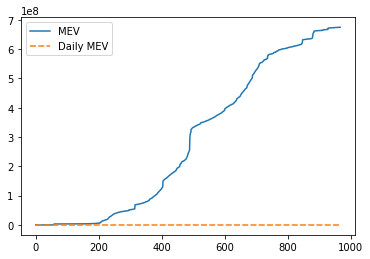

In [10]:
import seaborn as sns

sns.lineplot(data = MEV_Data)

In [11]:
data = MEV_Data["Daily MEV"]
# calculate quartiles
quartiles = percentile(data, [25, 50, 75])
# calculate min/max
data_min, data_max = data.min(), data.max()
# print 5-number summary
print('Five Number Summary of Daily MEV over time')
print('Min: %.3f' % data_min+' M')
print('Q1: %.3f' % quartiles[0]+' M')
print('Median: %.3f' % quartiles[1]+' M')
print('Q3: %.3f' % quartiles[2]+' M')
print('Max: %.3f' % data_max+' M')
print('Mean: %.3f'% data.mean()+' M')

Five Number Summary of Daily MEV over time
Min: 0.000 M
Q1: nan M
Median: nan M
Q3: nan M
Max: 13.778 M
Mean: 0.043 M


# CONCLUSION
**We claim that the mean cumulative sum of MEV till 8th Sept is 288783702.439 M and mean daily sum of MEV is 0.043 M **

In [12]:
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 kB 502.7 kB/s eta 0:00:00


In [13]:
MEV_Data.to_excel('MEV_Data.xlsx', index = False)